In [58]:
using MyBioTools, MyBioTools.FluTools
using TreeTools
using Plots
using StatsBase, Statistics
using FastaIO
using Random
using Measures
using LaTeXStrings
using Dates
using Printf

In [3]:
include("../../../make_all_plots.jl")
pyplot()
plot(rand(10),size=(1,1))

In [4]:
lfs = 16 # Legend font size
alfs = 18 # axis label font size
tfs = 18 # title font size
atfs = 18 # axis ticks font size
ga = 0.3 # grid alpha
sizes = (1200,800) # standard size for single plots
rl = 0.065 # position of the "A" or "B" label in % 
ms = 6 # marker size
ls = 6 # line size
plotfolder = "Simulation"

"Simulation"

In [25]:
dt_list = [10,30,100,300,1000];
dt = dt_list[5];

In [26]:
alphabins_ = 0.1:0.1:0.9
alphabins = [(a, 0.05) for a in alphabins_];

In [63]:
function getdat(aln)
    # Data
    println(aln)
    sp = FluTools.StrainPop(aln, seqtype=:artificial);
    binwidth = Day(15);
    binspacing = Day(30);
    FluTools.bin_by_date!(sp, binwidth=binwidth, binspacing = binspacing);
    ph_all = FluTools.positions_history(sp);
    # Trajectories
    trajectories = FluTools.all_trajectories(ph_all, keep_unfinished=false)
    trajectories = FluTools.previous_state_condition(trajectories, :lost);
    traj_fb = trajectory_freqbin(trajectories, alphabins);
    for (k,v) in traj_fb
        traj_fb[k] = FluTools.population_size_condition(v, 20, mode=:active)
    end
    # 
    return dat = vcat([[meanfreq(traj_fb[x]) pfix(traj_fb[x]) length(traj_fb[x])] for x in alphabins_]...)
end

getdat (generic function with 1 method)

In [32]:
pfix(traj) = sum([x.fixation==:fixed for x in traj]) / (sum([x.fixation==:fixed for x in traj]) + sum([x.fixation==:lost for x in traj]));
meanfreq(traj) = mean(t.freq[t.index[:active]] for t in traj)

meanfreq (generic function with 1 method)

# AB

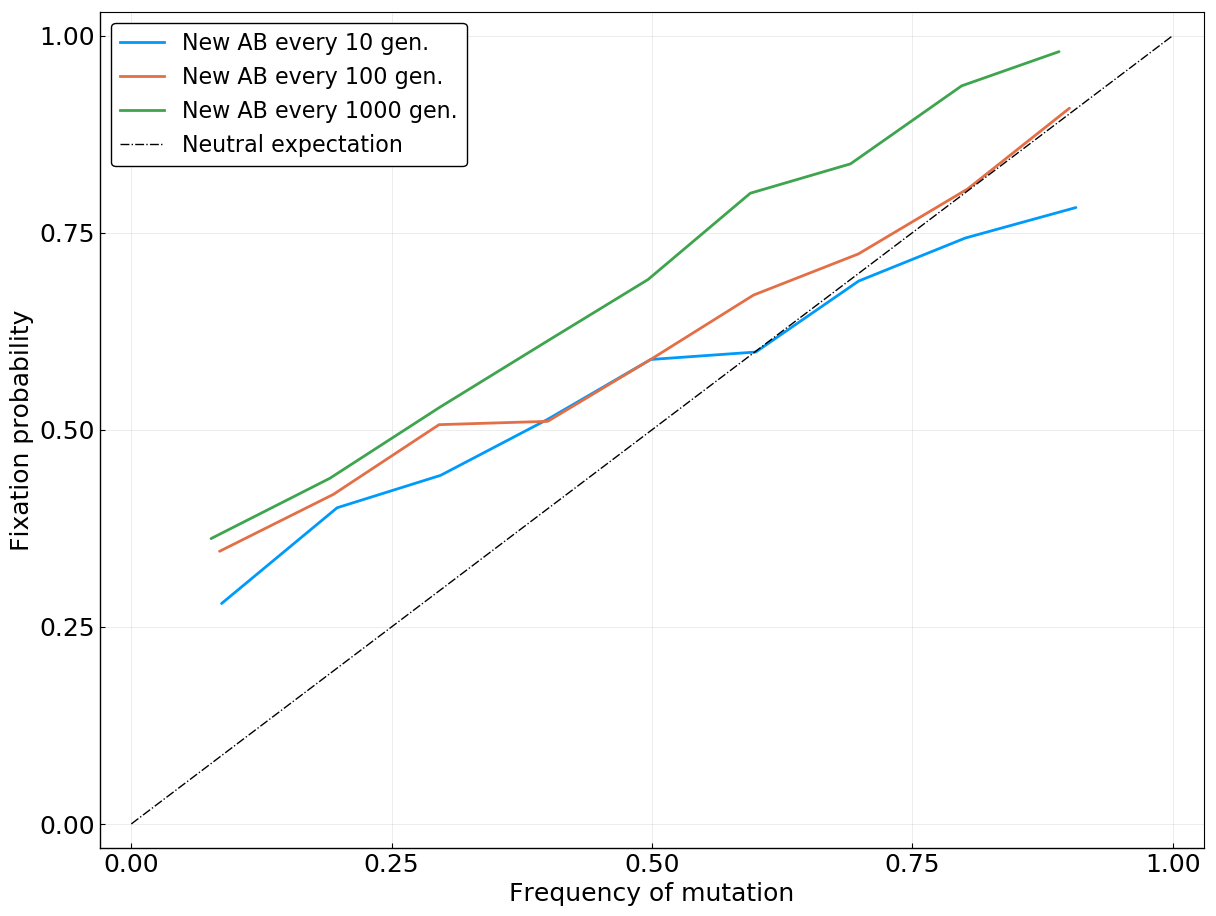

In [37]:
# dat = vcat([[meanfreq(traj_fb[x]) pfix(traj_fb[x])] for x in alphabins_]...)
# err = [x*(1-x)/sqrt(length(traj_fb[x])) for x in alphabins_]

# 
p = plot(size = (1200,900))
for dt in dt_list[1:2:end]
    aln = "../../../simulation/SimulatedData_AB/simulated_alignment_N10000_mueff0.001_s0.010_dt$(dt)_ABl5_nAB20_nf0.00_Vardt.txt"
    dat = getdat(aln)
    plot!(p, dat[:,1], dat[:,2], label="New AB every $dt gen.", line=(2))
end
plot!(p, [0,1],[0,1], label="Neutral expectation", line=(1,:black,:dashdot))

plot!(xlabel="Frequency of mutation", ylabel="Fixation probability")
plot!(p, legendfontsize=lfs, titlefontsize=tfs, guidefontsize=alfs, tickfontsize=atfs, frame=:box)
savefig("$plotfolder/Pfix_v_freq_AB.png")

# Simple - var dt

In [56]:
alphabins_ = 0.1:0.1:0.9
alphabins = [(a, 0.05) for a in alphabins_];

../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.001_s0.010_dt10.txt
../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.001_s0.010_dt100.txt
../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.001_s0.010_dt1000.txt


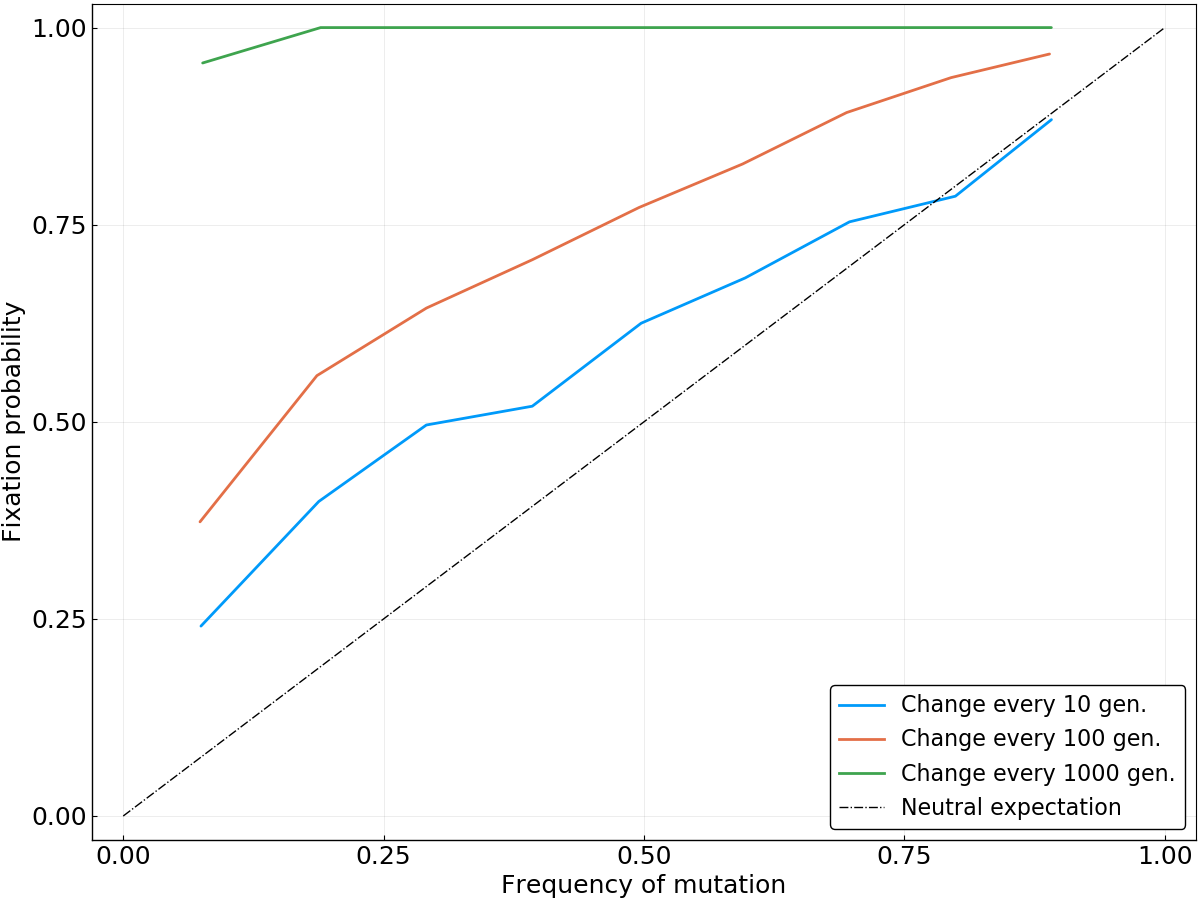

In [64]:
p = plot(size = (1200,900))
dt_list = [10,100,1000]
for dt in dt_list
    aln = "../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.001_s0.010_dt$(dt).txt"
    dat = getdat(aln)
    plot!(p, dat[:,1], dat[:,2], label="Change every $dt gen.", line=(2))
end
plot!(p, [0,1],[0,1], label="Neutral expectation", line=(1,:black,:dashdot))

plot!(xlabel="Frequency of mutation", ylabel="Fixation probability")
plot!(p, legendfontsize=lfs, titlefontsize=tfs, guidefontsize=alfs, tickfontsize=atfs, frame=:box)

In [55]:
p1
savefig(p1, "$plotfolder/Pfix_v_freq_classic_vardt")

In [46]:
aln = "../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.001_s0.010_dt100.txt"
sp = FluTools.StrainPop(aln, seqtype=:artificial);

../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.001_s0.010_dt100.txt
../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.030_s0.010_dt100.txt
../../../simulation/SimulatedData/simulated_alignment_N10000_mueff0.010_s0.010_dt100.txt


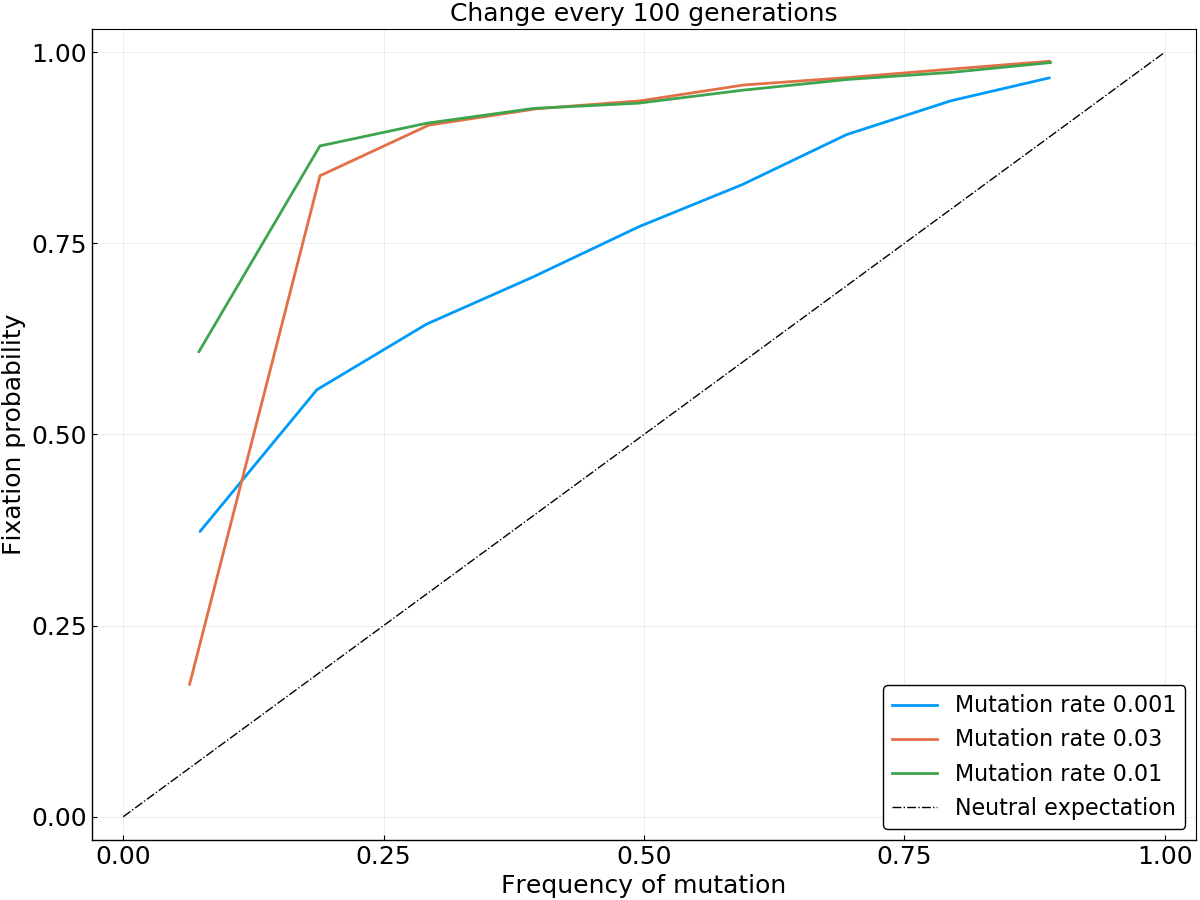

In [62]:
p = plot(size = (1200,900))
mu_list = [0.001, 0.03, 0.01]
for mu in mu_list
    aln = @sprintf("../../../simulation/SimulatedData/simulated_alignment_N10000_mueff%.3f_s0.010_dt100.txt", mu)
    dat = getdat(aln)
    plot!(p, dat[:,1], dat[:,2], label="Mutation rate $(mu)", line=(2))
end
plot!(p, [0,1],[0,1], label="Neutral expectation", line=(1,:black,:dashdot))
plot!(p, title="Change every 100 generations")
plot!(xlabel="Frequency of mutation", ylabel="Fixation probability")
plot!(p, legendfontsize=lfs, titlefontsize=tfs, guidefontsize=alfs, tickfontsize=atfs, frame=:box)